In [4]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This exercise is based around the relationship between the apparent brightness and
distance of objects of a standard brightness (so-called ‘standard candles’). It is useful
as the theoretical relation depends on the amount of Dark Matter, Dark Energy and
on the curvature of the Universe. Type I supernova are thought to arise from collapse
of white dwarf stars when the Chandrasekhar limit is reached, and are thus standard
candles, and the resulting “Supernova Hubble Diagram” was famously used to infer the
acceleration of the Universe, culminating in the award of the Nobel prize to Schmidt,
Perlmutter and Riess. We will build on this example in the hands-on exercises.

Here is some minimal information. We have some data, and a theoretical model,
which has some parameters. A very typical problem is to infer the model parameters
from the data. Here you will read in data, plot it, overplot some theoretical curves
(whose formula is slightly involved), and draw some simulated data at random.

**Data:**

We have a dataset of measurements μ at various different redshifts z. So the data
consists of pairs of values, z i , μ i ; i = 1, . . . 31. You will read these in and plot them later.

**Theory:**

At this stage, you do not need to understand these formulae, but they given theoretical
curves for $\mu$ as a function of $z$, for a model with two parameters in it, $h$ (Hubble constant,
in units of 100 km/s/Mpc) and $\Omega_{m}$ (matter density parameter). The equation is a little involved, and requires 4 lines of code to compute it, but you don't need to understand it, just code it.

Distance modulus $\mu$:

\begin{equation}
    \mu(z)
    =
    25 - 5 \log_{10} h + 5 \log_{10} \left( D^{*}_{L}(z) \right)
\end{equation}

where $D^{*}_{L}(z)$ is:

\begin{equation}
    D^{*}_{L}(z)
    =
    3000 (1+z) \left[ \eta (1,\Omega_{m}) - \eta \left( \frac{1}{1+z}, \Omega_{m} \right) \right]
\end{equation}

\begin{equation}
    \eta(a,\Omega_{m})
    =
    2
    \sqrt{s^{3} + 1}
    \left[
        \frac{1}{a^{4}}
        -
        0.1540 \frac{s}{a^{3}}
        +
        0.4304 \frac{s^{2}}{a^{2}}
        +
        0.19097 \frac{s^{3}}{a}
        +
        0.066941 s^{4}
    \right]^{-\frac{1}{8}}
\end{equation}

\begin{equation}
    s^{3}
    =
    \frac{1-\Omega_{m}}{\Omega_{m}}
\end{equation}

In [5]:
def calc_mu(z, h, Omega_m):
    
    DLstar = calc_DLstar(z, Omega_m)
    mu = 25.0 - 5.0 * np.log10(h) + 5.0 * np.log10(DLstar)
    return mu

In [6]:
def calc_DLstar(z, Omega_m):
    
    DLstar = 3000.0*(1.0+z)*(calc_eta(1.0,Omega_m) - calc_eta(1.0/(1.0+z), Omega_m))
    return DLstar

In [7]:
def calc_eta(a,Omega_m):
    
    s3 = (1.0 - Omega_m)/Omega_m
    s = np.power(s3, 1.0/3.0)
    s2 = s*s
    s4 = s2*s2

    y = 1.0/(a**4) - 0.1540 * (s/a**3) + 0.4304*(s2/a**2) + 0.19097 * (s3/a) + 0.066941 * s4
    eta = 2.0*np.sqrt(s3 + 1.0) * np.power(y,-1.0/8.0)
    
    return eta

In [8]:
JLA = pd.read_csv('jla_mub.txt', names=['z', 'mu'], skiprows=1, delim_whitespace=True)

Text(0,0.5,'$\\mu$')

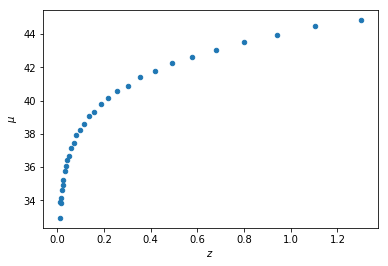

In [9]:
f,a = plt.subplots()
JLA.plot.scatter('z', 'mu', ax=a)
a.set_xlabel(r"$z$")
a.set_ylabel(r"$\mu$")

In [10]:
z_grid = np.linspace(0.0, 2.0, 100)

In [15]:
Omega_m_choices = [0.2, 0.3, 0.4, 0.5]
h = 0.7

In [17]:
mu_pred = {}
for Omega_m in Omega_m_choices:
    mu_pred[Omega_m] = calc_mu(z_grid, h, Omega_m)

/Users/edy/lib/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0,0.5,'$\\mu$')

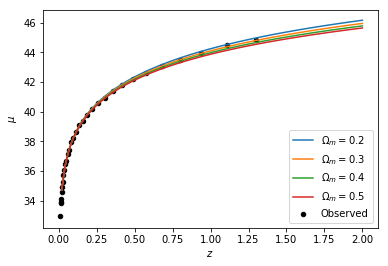

In [26]:
f,a = plt.subplots()
for Omega_m, mu in mu_pred.items():
    label = "$\Omega_{{m}} = {}$".format(Omega_m)
    a.plot(z_grid, mu, label=label)
JLA.plot.scatter('z', 'mu', ax=a, c='k', label='Observed')
plt.legend()
a.set_xlabel(r'$z$')
a.set_ylabel(r'$\mu$');

In [11]:
calc_mu(0.3, h=0.7, Omega_m=0.3)

40.964207890368684